In [ ]:
# BM 336546 - HW2
# Part I: Data Exploration


In [10]:
# Loading Data

import pandas as pd 
import numpy as np
from pathlib import Path
import random
%load_ext autoreload


T1D_dataset = pd.read_csv("HW2_data.csv") 
T1D = T1D_dataset[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger',
                            'Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis',
                            'Muscle Stiffness','Hair Loss','Obesity','Family History']]
Diagnosis = T1D_dataset[['Diagnosis']]

random.seed(10)  # fill your seed number here
T1D.sample(n=5, random_state=5)

T1D_features=T1D.copy()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# replacing nans with samples

i=T1D_features.columns.values

T1Dc_features={}    
for x in i:
    Q = T1D_features[x]
    null_ind=np.where(Q.isnull())[0]
   
    for ii in null_ind:
        Q.iloc[ii] = Q[np.random.choice(np.where(Q.notnull())[0])]
    T1Dc_features[x] = Q
    

T1Dc_features=pd.DataFrame(T1Dc_features)
T1Dc_features.sample(n=5, random_state=5)


C:\ANACONDA\envs\bm-336546\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
197,62,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,0
330,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,1
261,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
336,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
539,67,Male,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,0


In [43]:
T1Dc_features = pd.get_dummies(data=T1Dc_features, drop_first=True)
T1Dc_features.sample(n=5, random_state=5)


,Age,Family History,Gender_Male,Increased Urination_Yes,Increased Thirst_Yes,Sudden Weight Loss_Yes,Weakness_Yes,Increased Hunger_Yes,Genital Thrush_Yes,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Hair Loss_Yes,Obesity_Yes
197,62,0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
330,40,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
261,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
336,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
539,67,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


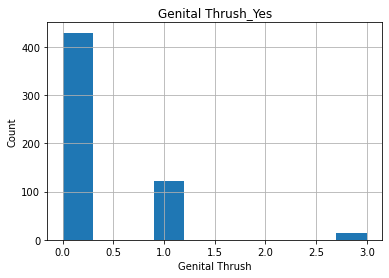

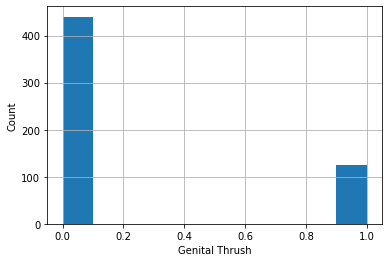

In [44]:
import matplotlib.pyplot as plt


feat = 'Genital Thrush'
Q = pd.DataFrame(T1D[feat])

idx_na = Q.index[Q[feat].isnull()].tolist()
Q = pd.get_dummies(data=Q, drop_first=True)


for i in idx_na:
    Q.loc[i] = 3



Q.hist(bins = 10)

plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()

T1Dc_features['Genital Thrush_Yes'].hist(bins = 10)
plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()

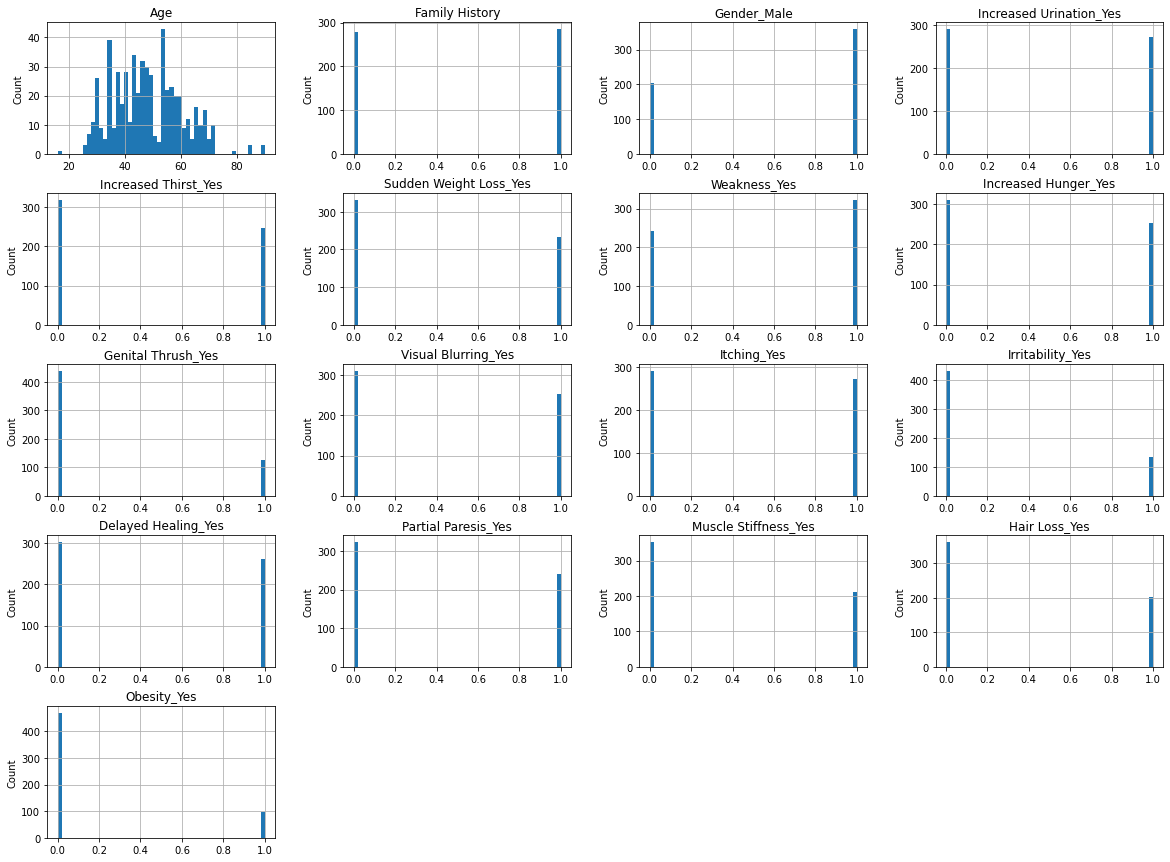

In [45]:
axarr = T1Dc_features.hist(bins=50, figsize=(20, 15)) # histograms of dataframe variables
for idx, ax in enumerate(axarr.flatten()):
#     ax.set_xlabel(i[idx])
    ax.set_ylabel("Count")
plt.show()

In [49]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


orig_feat = T1Dc_features.columns.values
X_train, X_test, y_train, y_test = train_test_split(T1Dc_features, np.ravel(Diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(Diagnosis))

# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

452
113
452
113


In [85]:
tbl1=[]

tbl1={'Train %':X_train.iloc[:,1:].sum()*100/len(X_train)}
tbl1['Test %']=X_test.iloc[:,1:].sum()*100/len(X_test)
tbl1['Delta %']=tbl1['Train %']-tbl1['Test %']
print(pd.DataFrame(tbl1))

                           Train %     Test %   Delta %
Family History           50.221239  52.212389 -1.991150
Gender_Male              63.938053  62.831858  1.106195
Increased Urination_Yes  48.230088  48.672566 -0.442478
Increased Thirst_Yes     44.469027  39.823009  4.646018
Sudden Weight Loss_Yes   40.265487  45.132743 -4.867257
Weakness_Yes             56.415929  60.176991 -3.761062
Increased Hunger_Yes     45.575221  42.477876  3.097345
Genital Thrush_Yes       21.238938  25.663717 -4.424779
Visual Blurring_Yes      45.796460  41.592920  4.203540
Itching_Yes              49.336283  44.247788  5.088496
Irritability_Yes         23.008850  25.663717 -2.654867
Delayed Healing_Yes      46.902655  43.362832  3.539823
Partial Paresis_Yes      42.699115  42.477876  0.221239
Muscle Stiffness_Yes     36.946903  38.938053 -1.991150
Hair Loss_Yes            34.292035  41.592920 -7.300885
Obesity_Yes              17.477876  14.159292  3.318584


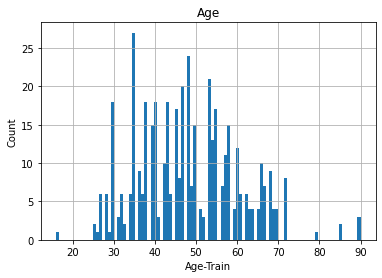

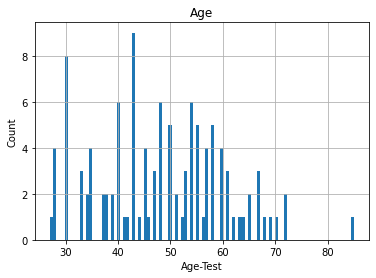

In [87]:
import matplotlib.pyplot as plt


feat = 'Age'
Q=X_train[[feat]]
Q.hist(bins = 100)

plt.xlabel('Age-Train')
plt.ylabel('Count')
plt.show()

q=X_test[['Age']]
q.hist(bins = 100)

plt.xlabel('Age-Test')
plt.ylabel('Count')
plt.show()



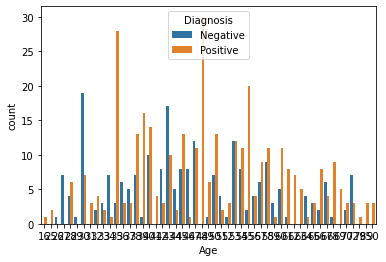

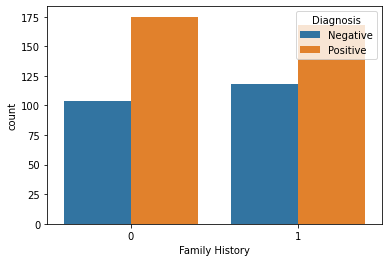

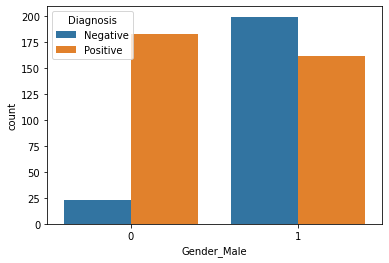

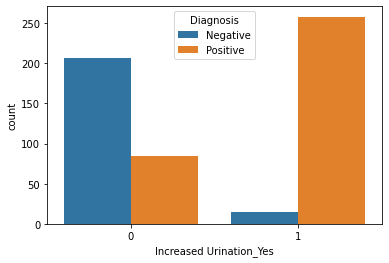

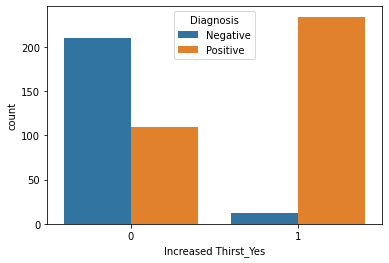

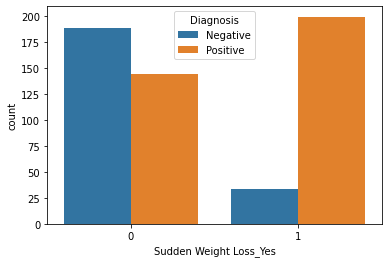

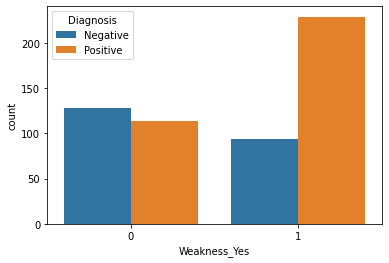

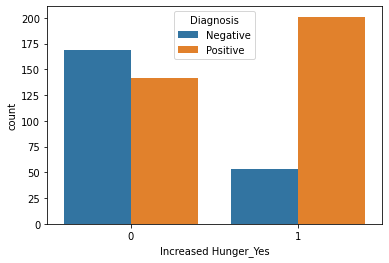

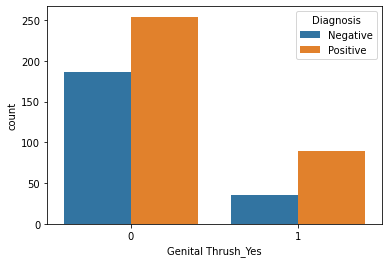

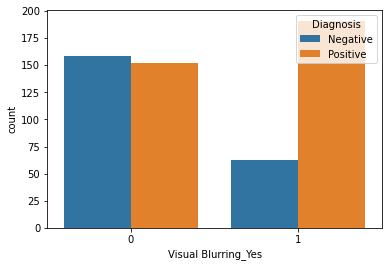

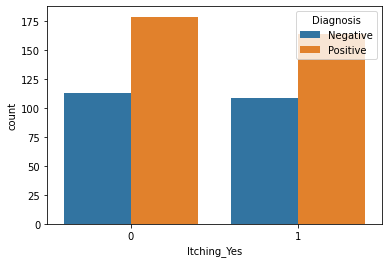

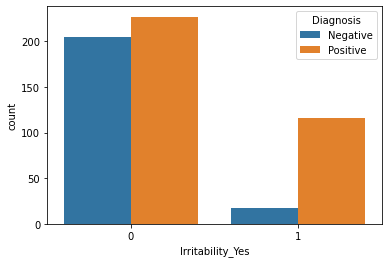

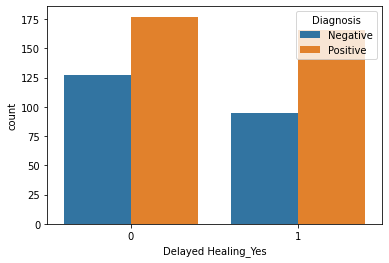

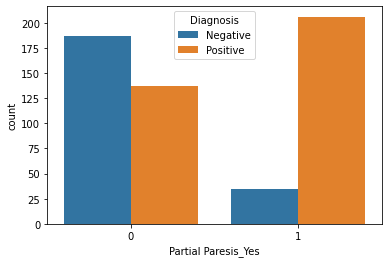

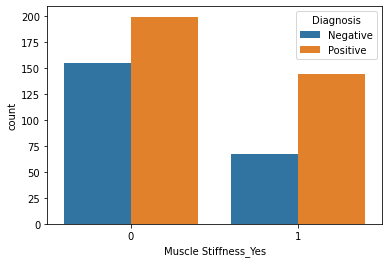

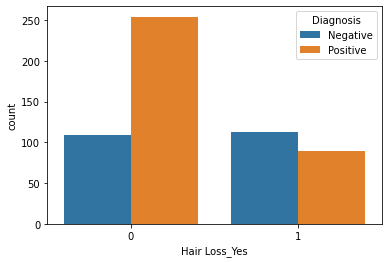

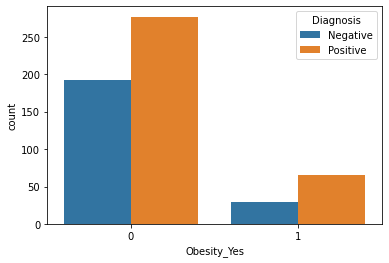

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

data_plotting=T1Dc_features.copy()
data_plotting['Diagnosis']=Diagnosis
features = T1Dc_features.columns.values
for feat in features:
    ax = sns.countplot(x=feat, hue="Diagnosis", data=data_plotting) 
   
    plt.show()
    

<AxesSubplot:>

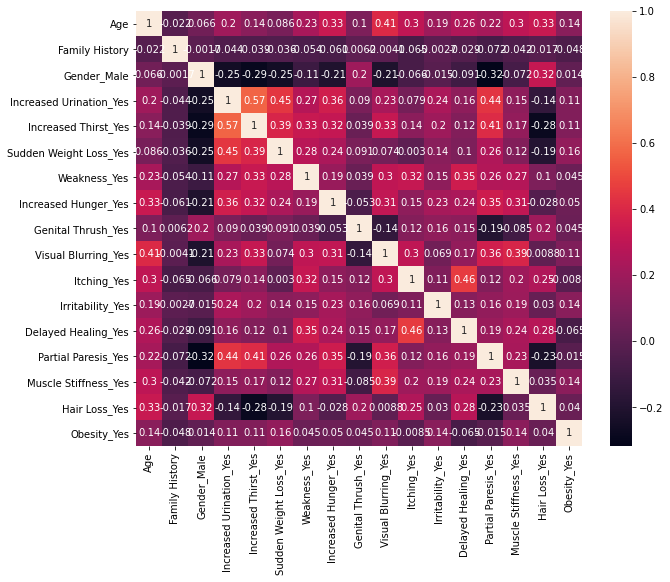

In [109]:
plt.figure(figsize = (10,8))
sns.heatmap(T1Dc_features.corr(), annot = True)

In [112]:
hot_vector=data_plotting.copy()
hot_vector['Diagnosis']=pd.get_dummies(data=hot_vector['Diagnosis'],drop_first=True)
del hot_vector['Age']
print(hot_vector)

     Family History  Gender_Male  Increased Urination_Yes  \
0                 0            1                        0   
1                 0            1                        0   
2                 0            1                        1   
3                 1            0                        0   
4                 0            0                        1   
..              ...          ...                      ...   
560               0            1                        1   
561               0            1                        0   
562               1            0                        1   
563               0            1                        0   
564               0            1                        0   

     Increased Thirst_Yes  Sudden Weight Loss_Yes  Weakness_Yes  \
0                       0                       0             1   
1                       0                       0             0   
2                       1                       0             1   